In [27]:
# importazione librerie necessarie 
import tensorflow as tf
import matplotlib.pylab as plt
import tensorflow_datasets as tfds

In [29]:
# datasets già pronti
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
dict_keys(['image', 'label'])
4
(28, 28, 1)


dict_keys(['image', 'label'])
1
(28, 28, 1)


dict_keys(['image', 'label'])
0
(28, 28, 1)


dict_keys(['image', 'label'])
7
(28, 28, 1)


dict_keys(['image', 'label'])
8
(28, 28, 1)




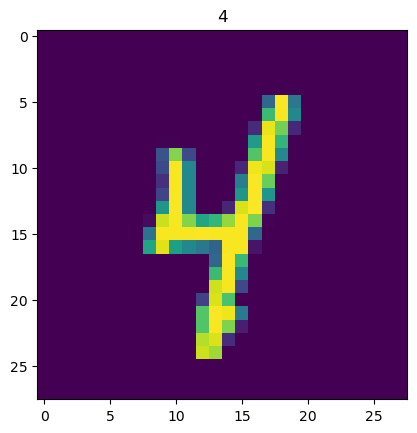

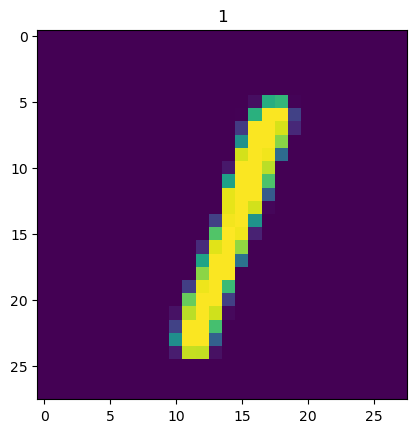

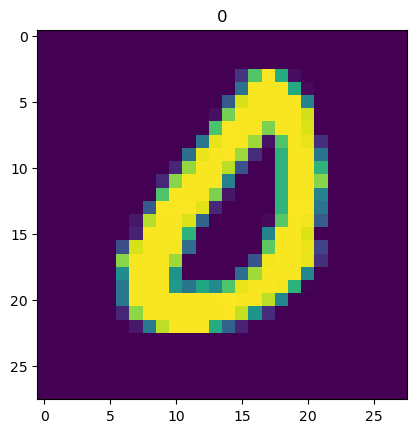

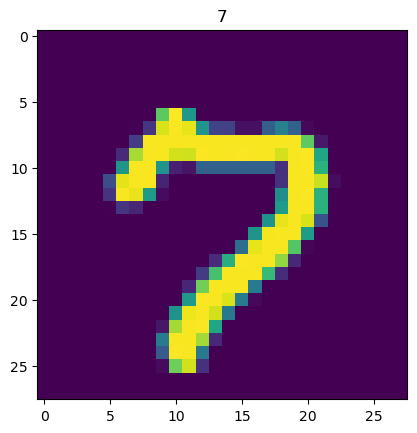

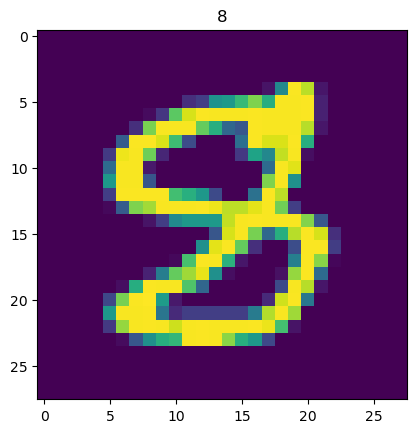

In [66]:
# carichiamo il dataset cats_vs_dogs che contiene delle immagini di cani e gatti
ds = tfds.load('mnist')

print(ds['train'])

for input_data in ds['train'].take(5):
    print(input_data.keys())
    #print(input_data['image'])
    image = input_data['image']
    label = input_data['label']
    print(label.numpy())
    print(image.shape)
    print("\n")
    plt.figure()
    plt.title(str(label.numpy()))
    plt.imshow(image)
    

In [80]:
# ora usiamo una API di tfds (split) per prendere solo percentuali della parte di train e di test del dataset

# prendiamo il 90% della parte di train 
# nella parte di test del dataset ci va anche il 10% restante della parte di train
ds = tfds.load(
    "mnist",
    split=['train[:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

print(ds)

data = ds[0]
info = ds[1]

print(info.splits['train'].num_examples)

([<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>], tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\felip\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,

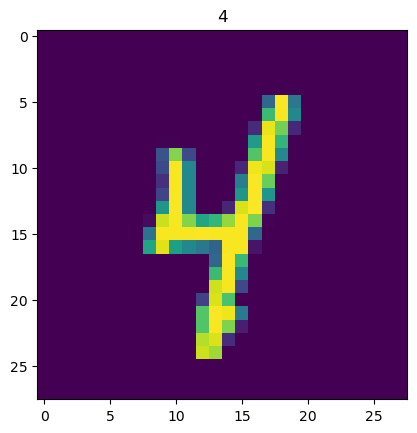

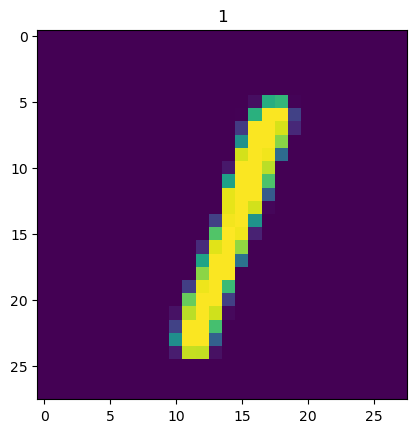

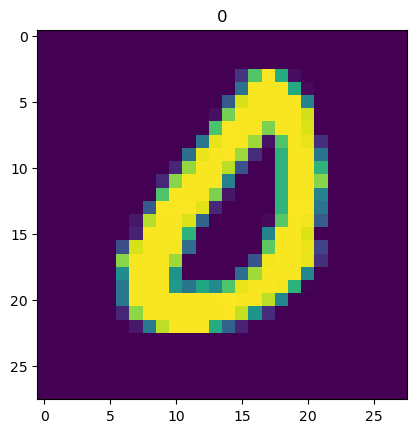

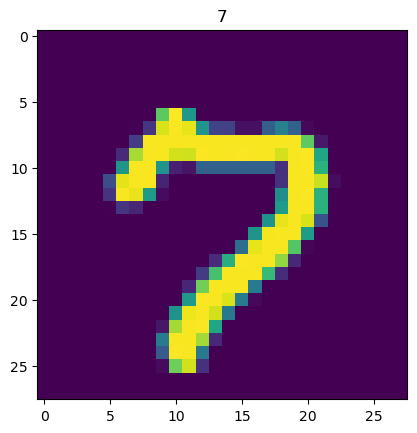

In [96]:
# data è in due parti una per il dataset di train la'ltra per il dataset di test
train_data = data[0] # -> ds[0][0]
test_data = data[1] # -> ds[0][1]

for image, label in train_data.take(4):
    plt.figure()
    plt.title(str(label.numpy()))
    plt.imshow(image)

In [98]:
# funzione MAP
IMAGE_SIZE = 100
def pre_process_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    return image, label

In [100]:
def_train_data = train_data.map(pre_process_image)

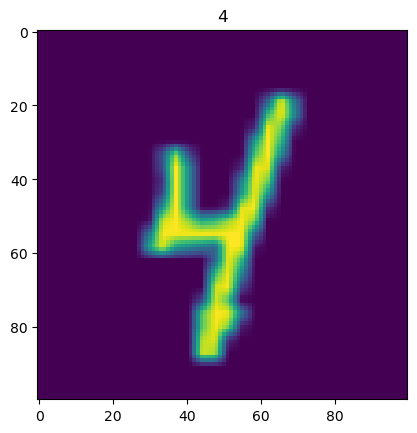

In [102]:
for image, label in def_train_data.take(1):
    plt.figure()
    plt.title(label.numpy())
    plt.imshow(image)